In [23]:
#IMPORTAR LAS LIBRERIAS 
import tensorflow as tf 
import numpy as np 
import os 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix








In [24]:
#EXTRAER LAS IMAGENES 


datos_entrenamiento=tf.keras.preprocessing.image_dataset_from_directory(
    "train/",
   
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    validation_split=0.2,
    image_size=(50,50),
    subset="training",
    seed=15,

)

datos_prueba=tf.keras.preprocessing.image_dataset_from_directory(
    "test/",
   
    label_mode="int",
    color_mode="rgb",
    batch_size=32,
    validation_split=0.2,
    image_size=(50,50),
    subset="training",
    seed=15,

)


Found 1632 files belonging to 7 classes.
Using 1306 files for training.
Found 805 files belonging to 7 classes.
Using 644 files for training.


In [25]:
class_names= datos_entrenamiento.class_names
print(class_names)


['CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']


2023-09-07 23:36:11.988361: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1306]
	 [[{{node Placeholder/_4}}]]
2023-09-07 23:36:11.989302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1306]
	 [[{{node Placeholder/_0}}]]


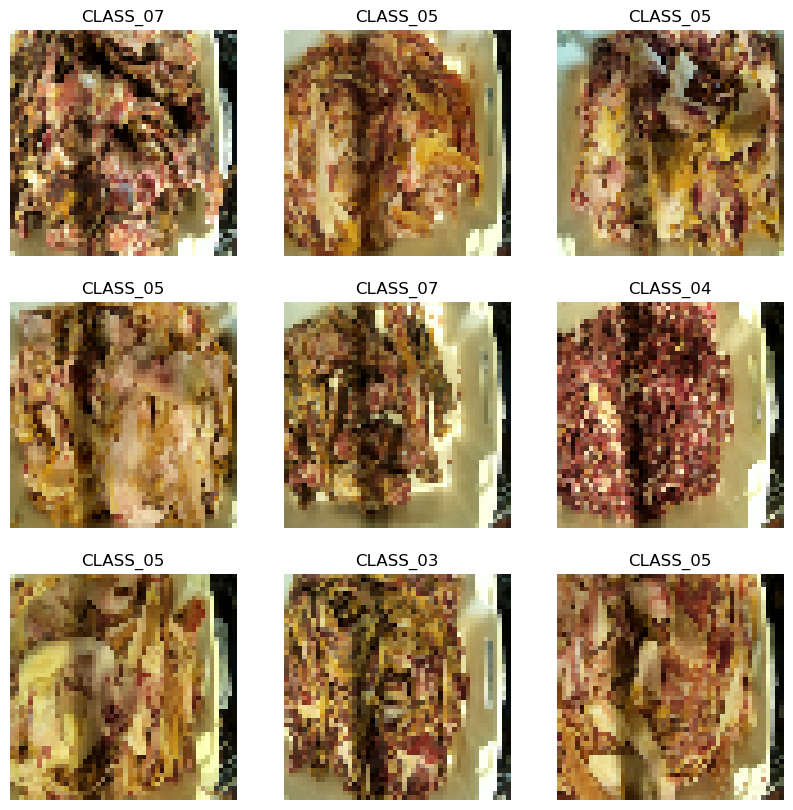

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in datos_entrenamiento.take(9):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")



In [27]:
normalization_layer= layers.Rescaling(1./255)

In [28]:
normalized_ds = datos_entrenamiento.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


2023-09-07 23:36:18.903714: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1306]
	 [[{{node Placeholder/_0}}]]
2023-09-07 23:36:18.904649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1306]
	 [[{{node Placeholder/_0}}]]


0.0 1.0


In [29]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(50,50 , 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes,activation='softmax')
])


In [30]:
opti=tf.keras.optimizers.AdamW()
model.compile(optimizer=opti,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [31]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 50, 50, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 25, 25, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 64)       

In [32]:
epochs=50
history = model.fit(
      datos_entrenamiento,
      validation_data=datos_prueba,
      epochs=epochs
)


Epoch 1/50


2023-09-07 23:36:39.964000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1306]
	 [[{{node Placeholder/_0}}]]
2023-09-07 23:36:39.964969: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1306]
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - ETA: 0s - loss: 1.4273 - accuracy: 0.5681

2023-09-07 23:36:53.460583: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [644]
	 [[{{node Placeholder/_4}}]]
2023-09-07 23:36:53.461258: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [644]
	 [[{{node Placeholder/_0}}]]


41/41 [==============================] - 19s 419ms/step - loss: 1.4273 - accuracy: 0.5681 - val_loss: 1.3385 - val_accuracy: 0.5606
Epoch 2/50
41/41 [==============================] - 13s 314ms/step - loss: 1.1573 - accuracy: 0.6110 - val_loss: 1.0566 - val_accuracy: 0.6615
Epoch 3/50
41/41 [==============================] - 15s 364ms/step - loss: 0.8497 - accuracy: 0.6937 - val_loss: 0.6645 - val_accuracy: 0.7298
Epoch 4/50
41/41 [==============================] - 16s 385ms/step - loss: 0.6480 - accuracy: 0.7489 - val_loss: 0.5412 - val_accuracy: 0.7981
Epoch 5/50
41/41 [==============================] - 16s 375ms/step - loss: 0.5061 - accuracy: 0.8193 - val_loss: 0.4553 - val_accuracy: 0.8230
Epoch 6/50
41/41 [==============================] - 13s 315ms/step - loss: 0.4802 - accuracy: 0.8239 - val_loss: 0.5998 - val_accuracy: 0.7717
Epoch 7/50
41/41 [==============================] - 12s 287ms/step - loss: 0.4177 - accuracy: 0.8553 - val_loss: 0.3921 - val_accuracy: 0.8556
Epoch 8/50

In [33]:
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model.save('./modelo/modelo4.h5')
model.save_weights('./modelo/pesos4.h5')